# <center> Enhancing DDoS Attack Detection using Big Data

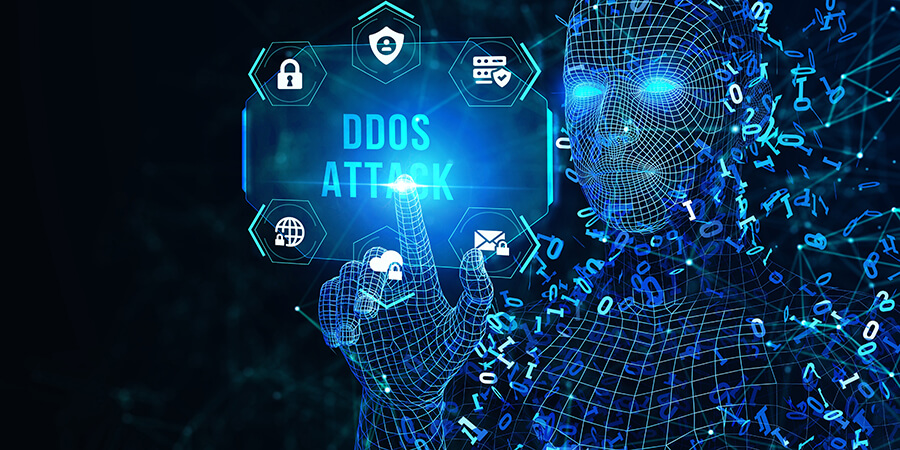

Name: **Natalia Iolchin**

Student No: **sba23303**

Assignment: **Integrated CA1 Sem 2 MSc in Data Analytics**
***

<a class="anchor" id="0.1"></a>
# Table of Contents

### [0. Introduction](#0)
* [**0.1 Data Mining Framework**](#0.0.1)
* [**0.2 Notebook Settings/Requirements**](#0.0.2)
* [**0.3. The programming paradigms**](#0.0.3)
* [**0.4. Data Visualisation basics**](#0.0.4)

### [1. Data Collection and Preprocessing](#1)
* [**1.1 Data Load**](#1.1)
* [**1.2 Creating DataFrame**](#1.2)
* [**Data Collection and Preprocessing part total execution time**](#1.5)
### [2. Exploratory data analysis (EDA)](#2)
* [**2.1 Summary information about the DataFrame**](#2.1)
* [**2.2 Features inspection**](#2.2)
* [**Data Exploration part total execution time**](#2.3)
### [3. Machine Learning Model training](#3)
* [**3.1 Transform the labels**](#3.1)
* [**3.2 Split data**](#3.2)
* [**3.3 Train model**](#3.3)
* [**Machine learning part total execution timet**](#3.5)
### [4. Feature importance analysis](#4.)
* [**4.1 Train model**](#4.1)
* [**4.2 Visualise the result**](#4.2)
* [**Feature Importance part total execution time**](#4.3)
### [5. Neural network implementation](#5)
* [**5.1 Filtering features**](#5.1)
* [**5.2 Split the data**](#5.2)
* [**5.3 Train the model**](#5.3)
* [**5.4 Assess the result**](#5.4)
* [**Neural Network part total execution time**](#5.5)

### [**Total execution time**](#6)
***

<a class="anchor" id="0"></a>
## 0. Introduction
[Back to Table of Contents](#0.1)

The project consists of 2 parts:
1. DDoS attack detection using artificial intelegence (current Jupyter Notebook)

2. Enhancing DDoS Attack Detection using Big Data
    
    You can find the code here
    
    https://github.com/Natidhcp/MSC_DA_sem2_CA1/blob/main/MSc_DA_CA1(BigData).ipynb
    
    Code is written in Python by using PySpark, Hadoop and Apache Spark


<a class="anchor" id="0.0.1"></a>
## 0.1. Data Mining Framework
[Back to Table of Contents](#0.1)

The overall approach adopted in this work combines methodologies from two prominent data mining processes: KDD (Knowledge Discovery in Databases) and SEMMA (Sample, Explore, Modify, Model, Assess). While the workflow in various sections might exhibit instances where multiple phases are intertwined or involve more sophisticated steps, the entire process consistently adheres to this established framework.

Specifically, the framework for handling data encompasses several sequential stages:

* Selection: Involves the identification and extraction of pertinent datasets or subsets from the available pool of data sources, aiming to focus on relevant information for analysis.

* Preprocessing: Encompasses data cleaning, handling missing values, standardizing formats, and other preparatory steps to ensure the data's quality and usability.

* Transformation: Entails converting and reshaping data to suit specific analysis needs or modeling requirements, such as normalization, scaling, or feature engineering.

* Exploration: Includes comprehensive exploration and examination of the data, employing visualization techniques and statistical analysis to gain insights and identify patterns or correlations.

* Modeling: Involves the creation and application of analytical models or algorithms to derive valuable predictions, classifications, or other insights from the processed data.

* Modification: Refers to iterative improvements or adjustments made to the models or data processing based on insights gained or performance evaluations.

* Assessment: Entails evaluating the models' performance, assessing the validity and accuracy of predictions or findings against predefined criteria or benchmarks.

This structured approach, encompassing these essential data-centric steps, forms the foundational framework guiding the analytical and processing stages within this work.

<a class="anchor" id="0.0.2"></a>
## 0.2. Notebook Settings/Requirements
[Back to Table of Contents](#0.1)

The command **!pip freeze** is used in Python to create a file containing a list of all installed Python packages and their respective versions in the current environment.

This file can be shared with others or used for reproducibility purposes. It allows someone else to recreate the same Python environment by running pip install -r requirements.txt, which installs all the listed packages and their specific versions. This is commonly used in Python projects to manage dependencies and ensure consistent environments across different systems.
* https://pip.pypa.io/en/stable/cli/pip_freeze/

In [1]:
!pip freeze > requirements.txt

**Used Python 3 environment comes with many helpful analytics libraries installed**

To make the code easier to understand, read and debug, all Python libraries are placed at the beginning of the code. 

To make the code cleaner, warning messages were turned off. This was done to remove unnecessary alerts and make the output easier to read.

In [2]:
# Importing necessary libraries

# Data loading and manipulation
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
import math #For mathematical operations and functions.
import os #interact with the operating system enabling functionalities like file handling and directory manipulation
from tqdm import tqdm
import time

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning and Neural Network
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

**pandas:** This library is used for handling and manipulating structured data through DataFrame objects, offering functionalities for data cleaning, exploration, and analysis.
* https://pandas.pydata.org/

**numpy:** It is a fundamental library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, as well as a collection of mathematical functions to operate on these arrays. It is commonly used for various numerical computations and linear algebra operations.
* https://numpy.org/

**Matplotlib and Seaborn:** Fundamental for static visualizations, Matplotlib forms the base for Seaborn, which offers simplified syntax and enhanced visualizations. Both libraries provide extensive plot types and customization options.
* https://matplotlib.org/
* https://seaborn.pydata.org/

**sklearn:** Known for its comprehensive library of machine learning algorithms and tools, providing a user-friendly interface and robust functionality for various tasks in machine.
* https://scikit-learn.org/stable/

<a class="anchor" id="0.0.3"></a>
## 0.3. The programming paradigms.
[Back to Table of Contents](#0.1)

### Common programming paradigms used throughout the project.

**Imperative Programming:** This paradigm is evident in the step-by-step sequence of commands that alter the program's state.

**Procedural Programming:** The code follows a sequence of procedures, loading data, modifying dataframes, performing calculations, and merging datasets to achieve specific tasks.

**Data Manipulation and Transformation:** Functional programming aspects are seen in data manipulation tasks using Pandas. Operations like loading data, grouping, filtering, and transforming data are performed.

**Visualization:** The code utilizes Matplotlib for generating bar and pie charts, specifying their attributes such as figure size, chart type, titles, labels, and custom colors.

<a class="anchor" id="0.0.4"></a>
## 0.4. Data Visualisation basics.
[Back to Table of Contents](#0.1)

### The most frequently applied Tufte principles in the work.

Edward Tufte's principles collectively contribute to the creation of visualizations that focus on effectively conveying the data while minimizing distractions and maximizing clarity. 

**Maximize Data-Ink Ratio:** visualizations have a considerable amount of data displayed with minimal non-data ink. The bar charts, pie chart, line plots, and map are  focused on representing the data rather than decorative elements, aligning with this principle.

**Use Clear, Detailed Labels:** The titles, axis labels, and legends in the visualizations offer clear and informative labeling, aiding in understanding the data being presented.

**Eliminate Chartjunk:** Some visualizations contain extra elements such as legends and grids, however they are generally kept to a minimum, allowing the data to be the primary focus.

**Provide Contextual Information:** Several visualizations include context-relevant information, such as the year, casualty rates, collision numbers over time, and geographical distribution, which helps viewers interpret the data.

**Respect the Integrity of the Data:** The visualizations represent the data accurately without manipulation or distortion, aligning with the principle of preserving data integrity.

Colorblind friendly palette used:
* https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps
* https://scottplot.net/cookbook/4.1/colors/#colorblind-friendly

<a class="anchor" id="1"></a>
## 1. Data Preprocessing
[Back to Table of Contents](#0.1)

Data sample consists of 16 files 1.02 GB size is taken from the following source:

Dataset source: https://www.unb.ca/cic/datasets/iotdataset-2023.html

*Citation
E. C. P. Neto, S. Dadkhah, R. Ferreira, A. Zohourian, R. Lu, A. A. Ghorbani. "CICIoT2023: A real-time dataset and benchmark for large-scale attacks in IoT environment," Sensor (2023) – (submitted to Journal of Sensors).

In [3]:
DATASET_DIRECTORY = '/home/hduser/1_NAT/CICIoT2023/'

In [4]:
# Create a DataFrame to store instruction execution times
instruction_execution_df = pd.DataFrame(columns=['Instruction', 'Count', 'AverageTime'])

# Function to calculate and print execution time
def print_execution_time(start_time, instruction):
    global instruction_execution_df, total_average_sum
    end_time = time.time()
    execution_time = end_time - start_time
    
    if instruction in instruction_execution_df['Instruction'].values:
        # If instruction is repeated, update the DataFrame values
        index = instruction_execution_df.index[instruction_execution_df['Instruction'] == instruction][0]
        count = instruction_execution_df.at[index, 'Count']
        new_count = count + 1
        old_average_time = instruction_execution_df.at[index, 'AverageTime']
        new_average_time = (old_average_time * count + execution_time) / new_count
        instruction_execution_df.at[index, 'Count'] = new_count
        instruction_execution_df.at[index, 'AverageTime'] = new_average_time
        total_average_sum += new_average_time - old_average_time
        print("\nAverage execution time for", instruction + ":", new_average_time, "seconds (", new_count, "executions)")
    else:
        # If instruction is encountered for the first time, add it to the DataFrame
        new_row = pd.DataFrame([[instruction, 1, execution_time]], columns=['Instruction', 'Count', 'AverageTime'])
        instruction_execution_df = pd.concat([instruction_execution_df, new_row], ignore_index=True)
        total_average_sum += execution_time
        print("\nExecution time for", instruction + ":", execution_time, "seconds")


<a class="anchor" id="1.1"></a>
## 1.1. Data Load
[Back to Table of Contents](#0.1)

In [5]:
# Variable to store the sum of all averages
total_average_sum = 0

In [6]:
start_time = time.time()  # Record the start time

# List CSV files in the directory and sort them
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()

print_execution_time(start_time, 'Data Load')


Execution time for Data Load: 0.004411458969116211 seconds


In [7]:
start_time = time.time()  # Record the start time

# Iterate over the files in the list
for i, name in enumerate(df_sets, start=1):
    # Print the file number and name
    print(f"{i}. {name}")

print_execution_time(start_time, 'Files Enumeration')

1. part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
2. part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
3. part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
4. part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
5. part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
6. part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
7. part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
8. part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
9. part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
10. part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
11. part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
12. part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
13. part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
14. part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
15. part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
16. part-00015-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv

Execution time for Files Enumera

<a class="anchor" id="1.2"></a>
### 1.2 Creating DataFrame
[Back to Table of Contents](#0.1)

In [8]:
start_time = time.time()  # Record the start time

# List to store DataFrames for each CSV file
combined_df = []

# Get list of CSV files
csv_files = [filename for filename in os.listdir(DATASET_DIRECTORY) if filename.endswith('.csv')]

# Iterate over each CSV file in the directory
for filename in tqdm(csv_files, desc='Processing CSV files'):
    filepath = os.path.join(DATASET_DIRECTORY, filename)
    # Read the CSV file into a DataFrame and append it to the list
    dfs = pd.read_csv(filepath)
    combined_df.append(dfs)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(combined_df, ignore_index=True)

print_execution_time(start_time, 'Creating DataFrame')

Processing CSV files: 100%|█████████████████████| 16/16 [00:31<00:00,  1.95s/it]



Execution time for Creating DataFrame: 32.90373754501343 seconds


<a class="anchor" id="1.5"></a>
### * Data Collection and Preprocessing part *total execution time*
[Back to Table of Contents](#0.1)

In [9]:
df_exec = pd.DataFrame(columns=['stage name', 'total execution time'])
df_exec.loc[0] = ['Data Preprocessing', total_average_sum]
df_exec

,stage name,total execution time
0,Data Preprocessing,32.916713


### Note:
At this stage there are 3 essential blocks of code that result:
1.  16 files loaded and sorted
2. Data Frame created


<a class="anchor" id="2"></a>
## 2. Exploratory data analysis (EDA)
[Back to Table of Contents](#0.1)

<a class="anchor" id="2.1"></a>
### 2.1. Summary information about the DataFrame
[Back to Table of Contents](#0.1)

In [10]:
# Variable to store the sum of all averages
total_average_sum = 0

start_time = time.time()  # Record the start time

# Summary 
print("\nData Summary")
df.info()

print_execution_time(start_time, 'Data Summary')


Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802000 entries, 0 to 3801999
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27

In [11]:
start_time = time.time()  # Record the start time

# Summary Statistics
print("\nData Distribution:")
print(df.describe())


print_execution_time(start_time, 'Data Distribution')


Data Distribution:
       flow_duration  Header_Length  Protocol Type      Duration  \
count   3.802000e+06   3.802000e+06   3.802000e+06  3.802000e+06   
mean    5.687310e+00   7.721244e+04   9.061357e+00  6.636323e+01   
std     2.713299e+02   4.631788e+05   8.936870e+00  1.407900e+01   
min     0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
25%     0.000000e+00   5.400000e+01   6.000000e+00  6.400000e+01   
50%     0.000000e+00   5.400000e+01   6.000000e+00  6.400000e+01   
75%     1.047072e-01   2.947025e+02   1.430000e+01  6.400000e+01   
max     9.943576e+04   9.889368e+06   4.700000e+01  2.550000e+02   

               Rate         Srate         Drate  fin_flag_number  \
count  3.802000e+06  3.802000e+06  3.802000e+06     3.802000e+06   
mean   9.037743e+03  9.037743e+03  3.805487e-06     8.651657e-02   
std    9.980201e+04  9.980201e+04  2.186489e-03     2.811254e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
25%    2.093640e+00  2.0936

In [12]:
start_time = time.time()  # Record the start time

print(df.shape)

print_execution_time(start_time, 'Data shape')

(3802000, 47)

Execution time for Data shape: 0.003669261932373047 seconds


In [13]:
start_time = time.time()  # Record the start time

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

print_execution_time(start_time, 'Missing Values')


Missing Values:
flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label            

<a class="anchor" id="2.2"></a>
### 2.2. Features inspection
[Back to Table of Contents](#0.1)

In [14]:
# List of feature column names
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
    'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
    'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
    'ece_flag_number', 'cwr_flag_number', 'ack_count',
    'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
    'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
    'Radius', 'Covariance', 'Variance', 'Weight', 
]

# Target column name
y_column = 'label'

In [15]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #framename = df.dataframeName
    df = df.dropna(axis=0) # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

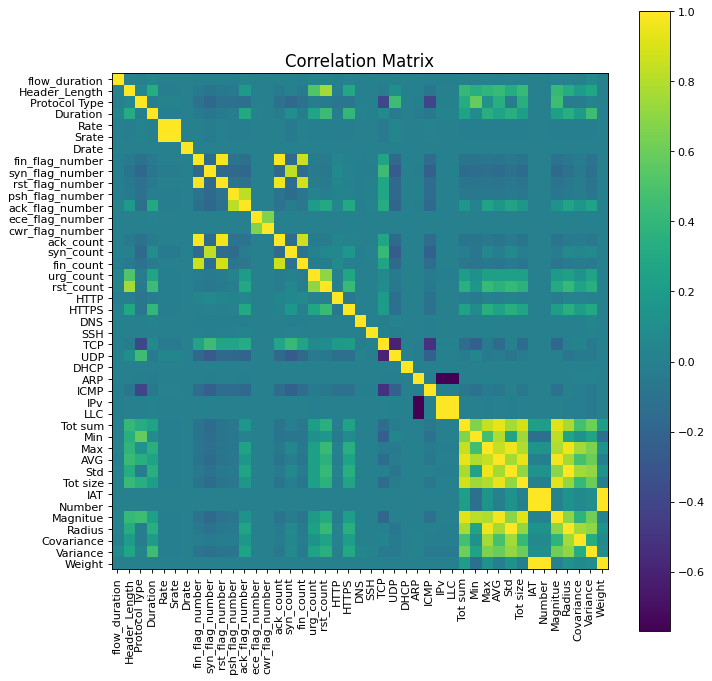

In [16]:
plotCorrelationMatrix(df[X_columns], 10)

In [17]:
start_time = time.time()  # Record the start time

# Unique Values (for categorical columns)
print(df.label.unique())
print(df.label.nunique())

print_execution_time(start_time, 'label list')

['Mirai-greeth_flood' 'DDoS-PSHACK_Flood' 'Mirai-greip_flood'
 'DoS-SYN_Flood' 'DoS-UDP_Flood' 'DDoS-ICMP_Flood' 'DDoS-RSTFINFlood'
 'DDoS-UDP_Flood' 'DoS-TCP_Flood' 'DDoS-SYN_Flood' 'DDoS-TCP_Flood'
 'Mirai-udpplain' 'DDoS-ICMP_Fragmentation' 'VulnerabilityScan'
 'DDoS-UDP_Fragmentation' 'DDoS-SynonymousIP_Flood'
 'DDoS-ACK_Fragmentation' 'MITM-ArpSpoofing' 'BenignTraffic'
 'CommandInjection' 'Recon-PortScan' 'DNS_Spoofing' 'Recon-HostDiscovery'
 'Recon-OSScan' 'DDoS-SlowLoris' 'DoS-HTTP_Flood' 'BrowserHijacking'
 'DictionaryBruteForce' 'SqlInjection' 'DDoS-HTTP_Flood'
 'Backdoor_Malware' 'XSS' 'Uploading_Attack' 'Recon-PingSweep']
34

Execution time for label list: 0.5719530582427979 seconds


<a class="anchor" id="2.3"></a>
### * Data Exploration part *total execution time*
[Back to Table of Contents](#0.1)

In [18]:
df_exec.loc[1] = ['EDA', total_average_sum]
df_exec

,stage name,total execution time
0,Data Preprocessing,32.916713
1,EDA,7.954334


### Note:

Stage 2 contain following essential blocks:
1. Data summary that result list of coumns with their data types. Thus we have 47 total columns: 46 feature columns float data type and 'label' column has object type values
2. Data Distribution, that result statistical summary.
3. Shape of data: 3802000 total rows and 47 columns
4. No missing values found
5. List of unique labels contain 34 unique values.

Non-essential steps:
6. Correlation matrix is not informative and hard readable


<a class="anchor" id="3"></a>
## 3. Machine Learning Model training
[Back to Table of Contents](#0.1)

The project's primary goal is focused on attack detection, which involves transforming the 34 labels into two categories: one suggesting that an attack has occurred and the other suggesting that it has not.

<a class="anchor" id="3.1"></a>
## 3.1. Transform the labels
[Back to Table of Contents](#0.1)

In [19]:
total_average_sum = 0
start_time = time.time()  # Record the start time

df['label'] = df['label'].apply(lambda x: 0 if x == 'BenignTraffic' else 1)
print("Number of unique values in 'label' column:", df['label'].value_counts())

print_execution_time(start_time, 'Data labeling') # Record the stop time

Number of unique values in 'label' column: label
1    3712305
0      89695
Name: count, dtype: int64

Execution time for Data labeling: 1.4446873664855957 seconds


<a class="anchor" id="3.2"></a>
## 3.2. Split data
[Back to Table of Contents](#0.1)

In [20]:
start_time = time.time()  # Record the start time

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df[X_columns], df[y_column], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print_execution_time(start_time, 'Split data') # Record the stop time


Execution time for Split data: 4.377202272415161 seconds


<a class="anchor" id="3.3"></a>
## 3.3. Train model
[Back to Table of Contents](#0.1)

In [21]:
start_time = time.time()  # Record the start time

# Define and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = lr_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1)

# Now, evaluate the model on the test set
y_pred = lr_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

print_execution_time(start_time, 'ML_model_DDoS_detection') # Record the stop time

Validation Accuracy: 0.9790215675960021
Validation Precision: 0.9886966021638087
Validation Recall: 0.9898294735140669
Validation F1 Score: 0.9892627135072264

Test Accuracy: 0.9790391022268982
Test Precision: 0.9885924876482878
Test Recall: 0.9899559484023439
Test F1 Score: 0.9892737482300877

Execution time for ML_model_DDoS_detection: 54.39612054824829 seconds


<a class="anchor" id="3.5"></a>
### * Machine learning part *total execution time*
[Back to Table of Contents](#0.1)

In [23]:
df_exec.loc[2] = ['Model training', total_average_sum]
df_exec

,stage name,total execution time
0,Data Preprocessing,32.916713
1,EDA,7.954334
2,Model training,60.218010


### Note
List of essential steps for this stage is: 

1. Mapping the original labels to binary values. 'BenignTraffic' is mapped to 0 and all other labels are mapped to 1. The transformation simplifies the classification task into a binary classification problem, which is easier to model and interpret.
2. Split the data to 70% for train and 30% for test
3. Logistic regression model train In the context of logistic regression, feature scaling is not typically required as it doesn't rely on distance-based calculations or optimization algorithms.
4. Results assesment:
* Accuracy calculates the proportion of correctly classified instances out of the total number of instances - our model provide us a good high score. 
* Precision calculates the ratio of true positive predictions to the total number of positive predictions (true positives plus false positives)
* Recall calculates the ratio of true positive predictions to the total number of actual positive instances (true positives plus false negatives).
* F1 Score provides a balance between precision and recall, making it suitable for imbalanced datasets.The F1 score is useful when both false positives and false negatives need to be minimized.


<a class="anchor" id="4."></a>
## 4. Feature importance analysis
[Back to Table of Contents](#0.1)

Using feature importance analysis before applying neural networks (NN) offers several advantages: It is not only capable of feature selection and relevant feature generation but also improves efficiency and minimizes the risk of overfitting during the process of training which usually causes problems in scenarios where the feature-to-sample ratio is high. Also, it not only prevented overfitting but made the model more useful for the other groups with sharpened generalization ability. Not only does this make the process more effective, but it also plays a role in increasing the efficiency by minimising the number of input features, reducing the training time and therefore the resource requirements. Briefly, through this preprocessing step, data modeling process becomes more easy but also more understandable, putting more emphasis on generalization performance and still staying computational efficient.

<a class="anchor" id="4.1"></a>
### 4.1 Train model
[Back to Table of Contents](#0.1)

In [24]:
total_average_sum = 0
start_time = time.time()  # Record the start time

# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(df[X_columns], df[y_column])

# Get feature importances from the trained model
importances = rf.feature_importances_

print_execution_time(start_time, 'ML_model_Features') # Record the stop time


Execution time for ML_model_Features: 1071.752784729004 seconds


<a class="anchor" id="4.2"></a>
### 4.2 Visualise the result
[Back to Table of Contents](#0.1)

In [25]:
start_time = time.time()  # Record the start time

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_columns, 'Importance': importances})

# Sort the DataFrame by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importance:")
print(feature_importance_df.round(5))

print_execution_time(start_time, 'feature_sort_values') # Record the stop time

Feature Importance:
            Feature  Importance
39              IAT     0.18040
18        rst_count     0.12964
17        urg_count     0.11772
0     flow_duration     0.06288
45           Weight     0.05931
3          Duration     0.05334
40           Number     0.05063
44         Variance     0.04495
1     Header_Length     0.03078
4              Rate     0.02994
5             Srate     0.02747
35              Max     0.02673
20            HTTPS     0.02296
36              AVG     0.02003
37              Std     0.01973
38         Tot size     0.01649
41         Magnitue     0.01432
43       Covariance     0.01422
42           Radius     0.01236
33          Tot sum     0.01109
2     Protocol Type     0.01004
11  ack_flag_number     0.00932
15        syn_count     0.00919
34              Min     0.00769
16        fin_count     0.00487
14        ack_count     0.00465
19             HTTP     0.00357
10  psh_flag_number     0.00179
8   syn_flag_number     0.00117
26              TCP 

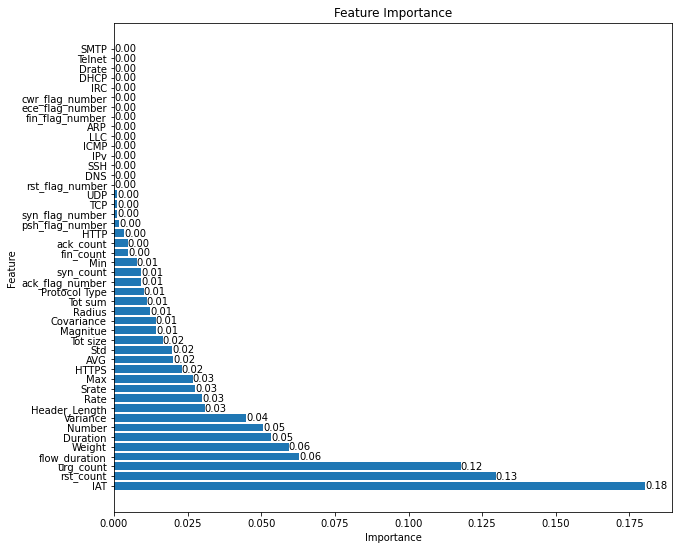


Execution time for Plot feature importances: 2.6413776874542236 seconds


In [26]:
start_time = time.time()  # Record the start time

plt.figure(figsize=(10, 9))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# Display values on the bars
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

print_execution_time(start_time, 'Plot feature importances') # Record the stop time

<a class="anchor" id="4.3"></a>
### * Feature Importance stage *total execution time*
[Back to Table of Contents](#0.1)


In [27]:
df_exec.loc[3] = ['Feature importance', total_average_sum]
df_exec

,stage name,total execution time
0,Data Preprocessing,32.916713
1,EDA,7.954334
2,Model training,60.218010
3,Feature importance,1074.747521


### Note
2 essential steps performed for the feature importance analysis stage
1. RandomForestClassifier Model trained. 
2. The resulting dataframe is printed

Non essential step

3. The resulting dataframe visualised

Despite the fact that visualisation plot provide us sorted data with values, printed table is more informative and easy readable. Relevant features scores can be easy identified. FOr our dataset features with score higher than 0.001 will be taken.

<a class="anchor" id="5"></a>
## 5. Neural network implementation
[Back to Table of Contents](#0.1)

MLPs (Multilayer Perceptrons) are good about DDoS (Distributed Denial of Service) detection for various reasons. Their power in detecting non-linear data that helps detecting advanced attack patterns has proved very vital. Furthermore, MLPs can detect relevant features from raw data as well as adapt to changing attack strategies, which is attributable to their ability to learn. They can tackle large volumes of network traffic and generalize well to unseen data, thus, leading to identification of the DDoS attack patterns in the real time. Integration with ensemble methods improve the outcome further but techniques such features importance analysis facilitate to understand a model decision. The fact that MLPs are black box models does not preclude the development of interpretation methods that will help in understanding and developing more effective detection capabilities over time.

<a class="anchor" id="5.1"></a>
## 5.1 Filtering features
[Back to Table of Contents](#0.1)

In [28]:
total_average_sum = 0
start_time = time.time()  # Record the start time

# Filter features based on importance scores greater than 0.005
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.001]['Feature'].tolist()

# Select features and target variable
X = df[selected_features]
y = df['label']

print_execution_time(start_time, 'selected_features') 


Execution time for selected_features: 1.2435111999511719 seconds


<a class="anchor" id="5.2"></a>
## 5.2 Split the data
[Back to Table of Contents](#0.1)

In [29]:
start_time = time.time()  # Record the start time

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print_execution_time(start_time, 'Split_nn_data') # Record the stop time


Execution time for Split_nn_data: 3.277557611465454 seconds


<a class="anchor" id="5.3"></a>
## 5.3 Train the model
[Back to Table of Contents](#0.1)

In [30]:
start_time = time.time()  # Record the start time

# Train a Multilayer Perceptron (MLP) classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

print_execution_time(start_time, 'Train NN model') # Record the stop time


Execution time for Train NN model: 942.9938223361969 seconds


### Model description

In [31]:
print("Default Activation Function:",mlp.activation)
print("Default Loss Function:",mlp.loss)

Default Activation Function: relu
Default Loss Function: log_loss


<a class="anchor" id="5.4"></a>
## 5.4 Assess the result
[Back to Table of Contents](#0.1)

In [32]:
start_time = time.time()  # Record the start time

# Make predictions on the test set
mlp_pred = mlp.predict(X_test)

# Evaluate MLP model
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)
mlp_f1 = f1_score(y_test, mlp_pred)

print("Multilayer Perceptron (MLP) Model Evaluation:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1 Score:", mlp_f1)
print("Loss:", mlp.loss_)

print_execution_time(start_time, 'MLP results') # Record the stop time

Multilayer Perceptron (MLP) Model Evaluation:
Accuracy: 0.9763738383307031
Precision: 0.9763738383307031
Recall: 1.0
F1 Score: 0.9880457020776736
Loss: 0.11175574715303262

Execution time for MLP results: 15.785534858703613 seconds


**Note:**

The default **activation function** for hidden layers in MLPClassifier is the ReLU (rectified linear unit), it is commonly used for its ability to handle non-linearities and prevent vanishing gradients during training.

The **loss function** used is the binary cross-entropy loss, also known as the logistic loss or log loss. This loss function is used for binary classification problems where the output is a probability between 0 and 1, which is a case.

All steps for this stage are essential

<a class="anchor" id="5.5"></a>
### *total execution time*
[Back to Table of Contents](#0.1)

In [33]:
df_exec.loc[4] = ['Neural network', total_average_sum]
df_exec

,stage name,total execution time
0,Data Preprocessing,32.916713
1,EDA,7.954334
2,Model training,60.218010
3,Feature importance,1074.747521
4,Neural network,963.300426


<a class="anchor" id="6"></a>
### List of essential blocks of code
[Back to Table of Contents](#0.1)

In [34]:
instruction_execution_df

,Instruction,Count,AverageTime
0,Data Load,1,0.004411
1,Files Enumeration,1,0.008564
2,Creating DataFrame,1,32.903738
3,Data Summary,1,0.138866
4,Data Distribution,1,6.775831
5,Data shape,1,0.003669
6,Missing Values,1,0.464015
7,label list,1,0.571953
8,Data labeling,1,1.444687
9,Split data,1,4.377202


In [35]:
# Assuming /user1/result.csv is the correct path to your file
file_path = '/home/hduser/1_NAT/CA_1/result.csv'

# Reading the CSV file into a DataFrame
df_exec_big = pd.read_csv(file_path)


In [36]:
df_exec_big

,stage name,total execution time
0,Data Preprocessing,42.067364
1,EDA,651.258600
2,Model training,908.024000
3,Feature importance,1118.259000
4,Neural network,9123.198000


In [37]:
# Calculate total execution time
total_execution_time = df_exec['total execution time'].sum()

# Add the total execution time row directly to the DataFrame
df_exec.loc[len(df_exec)] = ['Total execution time', total_execution_time]

In [38]:
# Calculate total execution time
total_execution_time = df_exec_big['total execution time'].sum()

# Add the total execution time row directly to the DataFrame
df_exec_big.loc[len(df_exec)] = ['Total execution time', total_execution_time]

In [39]:
# Merge the two DataFrames based on the 'stage name' column
merged_df = pd.merge(df_exec, df_exec_big, on='stage name')

# Rename the added column
merged_df = merged_df.rename(columns={'total execution time_y': 'Big Data exec_time',
                                      'total execution time_x': 'Non-Big Data exec_time' })


In [40]:
merged_df

,stage name,Non-Big Data exec_time,Big Data exec_time
0,Data Preprocessing,32.916713,42.067364
1,EDA,7.954334,651.258600
2,Model training,60.218010,908.024000
3,Feature importance,1074.747521,1118.259000
4,Neural network,963.300426,9123.198000
5,Total execution time,2139.137004,11842.806964


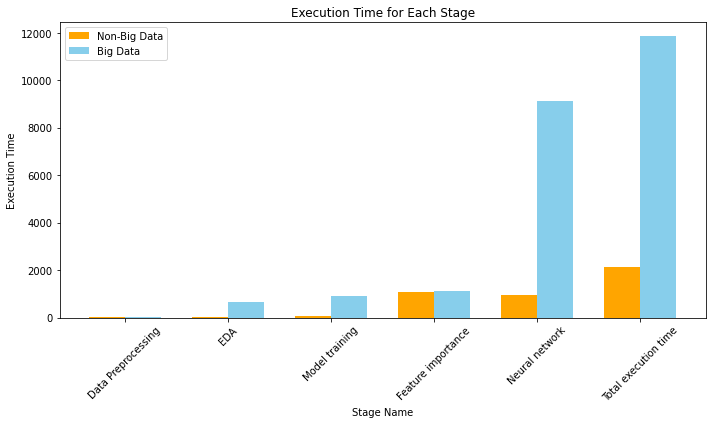

In [41]:
# Set the width of the bars
bar_width = 0.35

# Define the x positions for the bars
x = np.arange(len(merged_df))

# Create a bar plot
plt.figure(figsize=(10, 6))

# Plotting Non-Big Data execution time
plt.bar(x - bar_width/2, merged_df['Non-Big Data exec_time'], bar_width, color='orange', label='Non-Big Data')

# Plotting Big Data execution time
plt.bar(x + bar_width/2, merged_df['Big Data exec_time'], bar_width, color='skyblue', label='Big Data')

# Adding labels and title
plt.xlabel('Stage Name')
plt.ylabel('Execution Time')
plt.title('Execution Time for Each Stage')

# Adding legend
plt.legend()

# Setting x-axis ticks and labels
plt.xticks(x, merged_df['stage name'], rotation=45)

# Show plot
plt.tight_layout()
plt.show()